<a href="https://colab.research.google.com/github/Ketaki124/Creditcard_Fraud_Detection/blob/main/Creditcard_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Required Libraries**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE  # For handling class imbalance


**Load and Explore the Dataset**

In [2]:
# Load the dataset
df = pd.read_csv('/content/creditcard.csv')

# View the structure and first few rows of the dataset
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

**Preprocess the Data**

In [3]:
# Check for missing values
print(df.isnull().sum())


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [4]:
df.drop(['Time'], axis=1, inplace=True)


**Handle Class Imbalance**

In [5]:
from imblearn.over_sampling import SMOTE

# Define the features (X) and target (y)
X = df.drop('Class', axis=1)
y = df['Class']

# Apply SMOTE to balance the dataset
smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X, y)


**Normalize the Data**

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_sm)


**Split the Data into Training and Testing Sets**

In [7]:
# Split the balanced dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_sm, test_size=0.2, random_state=42, stratify=y_sm)


**Train the Classification Model**

In [9]:
# Initialize RandomForest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

**Make Predictions on the Test Set**

In [10]:
# Predict on test data
y_pred = rf_model.predict(X_test)


In [11]:
# Convert the predicted and actual values into a DataFrame for better visualization
pred_vs_actual = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

# Print the first 10 samples of the actual and predicted values
print(pred_vs_actual.head(10))


        Actual  Predicted
510747       1          1
390373       1          1
81077        0          0
236854       0          0
407198       1          1
220669       0          0
152968       0          0
501562       1          1
270953       0          0
478895       1          1


**Evaluate the Model’s Performance**

In [12]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.9999
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

[[56847    16]
 [    0 56863]]


**Confusion Matrix Plot**

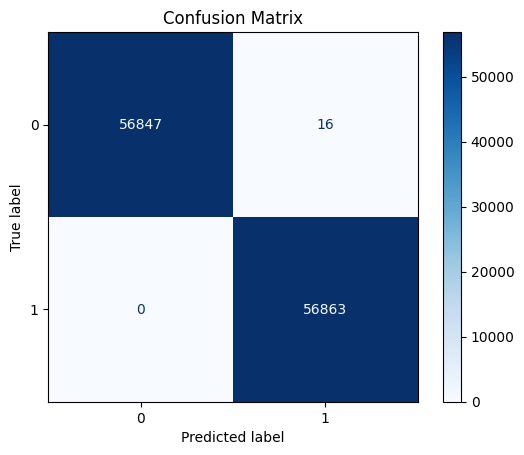

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=rf_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


**Predicted vs Actual Values**

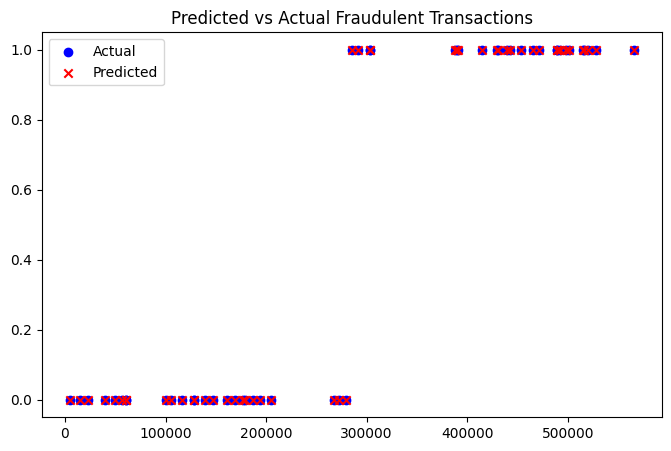

In [18]:
# Random sample of predicted vs actual values
plt.figure(figsize=(8, 5))
sample_df = pred_vs_actual.sample(50)  # Show 50 samples
plt.scatter(sample_df.index, sample_df['Actual'], color='blue', label='Actual')
plt.scatter(sample_df.index, sample_df['Predicted'], color='red', marker='x', label='Predicted')
plt.legend()
plt.title('Predicted vs Actual Fraudulent Transactions')
plt.show()
